In [9]:
#install.packages("MCMCglmm")
library(MCMCglmm)
library(lme4) #random effect
library(rptR) 

# Download data

In [10]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/ALLDATA_'
path_adapt = file.path(path_,'Adaptability')
path_model = file.path(path_adapt,'repeatability_model')
df = read.csv(file.path(path_adapt,'df_MVT_4individualtyStatistics.csv'), header = TRUE, sep = ";")
df$HenID = as.factor(df$HenID)   
df$PenID = as.factor(df$PenID) 
df$WIB = as.factor(df$WIB) 
df$TrackingSystemID = as.factor(df$TrackingSystemID) 
#li_var_cont = c('ID0','ID1','ID2','ID3','ID4','ID5','ID6','ID7')
#df$maxsevGap0_divided_maxsev_round = round(df$maxsevGap0_divided_maxsev, 1)
#df$maxsevGap0_divided_maxsev_round_log <- log(df$maxsevGap0_divided_maxsev_round)
#print(as.data.frame(table(df$maxsevGap0_divided_maxsev_round)))
#df_ = df[,c(li_var_cont, 'maxsevGap0_divided_maxsev_round','maxsevGap0_divided_maxsev_round_log')] 
print(dim(df))
summary(df)

[1] 3161   28


      WIB          HenID           DIB        weeklyavgDIB      CLASS          
 5      :455   hen_124:  49   Min.   : 1.0   Min.   : 3.25   Length:3161       
 6      :455   hen_126:  49   1st Qu.:18.0   1st Qu.:18.00   Class :character  
 7      :455   hen_127:  49   Median :30.0   Median :32.00   Mode  :character  
 4      :453   hen_131:  49   Mean   :29.4   Mean   :29.40                     
 3      :420   hen_134:  49   3rd Qu.:42.0   3rd Qu.:39.00                     
 1      :358   hen_135:  49   Max.   :54.0   Max.   :52.00                     
 (Other):565   (Other):2867                                                    
             TrackingSystemID   PenID     perc_duration_5_Zone
 TrackingSystem 10-12:1613    pen10:882   Min.   :  0.00      
 TrackingSystem 3-5  : 764    pen12:731   1st Qu.:  8.00      
 TrackingSystem 8-9  : 784    pen4 :764   Median : 26.00      
                              pen8 :784   Mean   : 35.17      
                                          3rd

# Initialisation

In [11]:
#param
nb = 1000

# Repeatabilities

In [ ]:
#tries transformations and add within and between ind. variation!

In [16]:
#initialisation
li_R_org = c()
li_R_link = c()
li_CIL_org = c()
li_CIU_org = c()
li_CIL_link = c()
li_CIU_link = c()
li_P = c()
li_se_link = c()
li_se_org = c() 
li_ngroup = c()
li_nobs = c()
li_mod = c()
li_var = c()
li_wib = c()
nb = 1000

Bootstrap Progress:


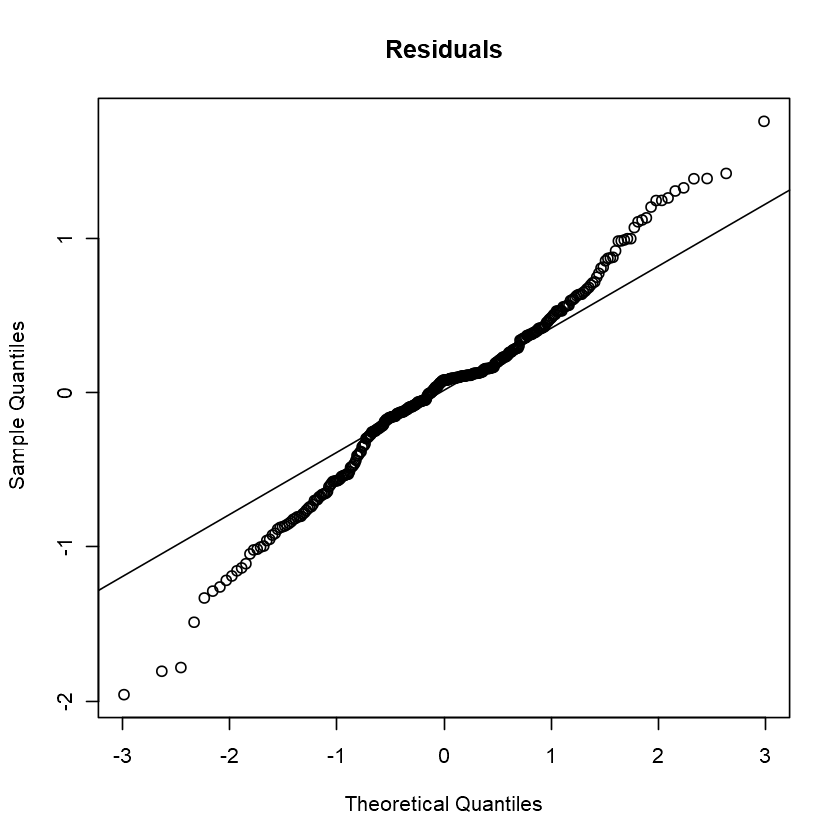

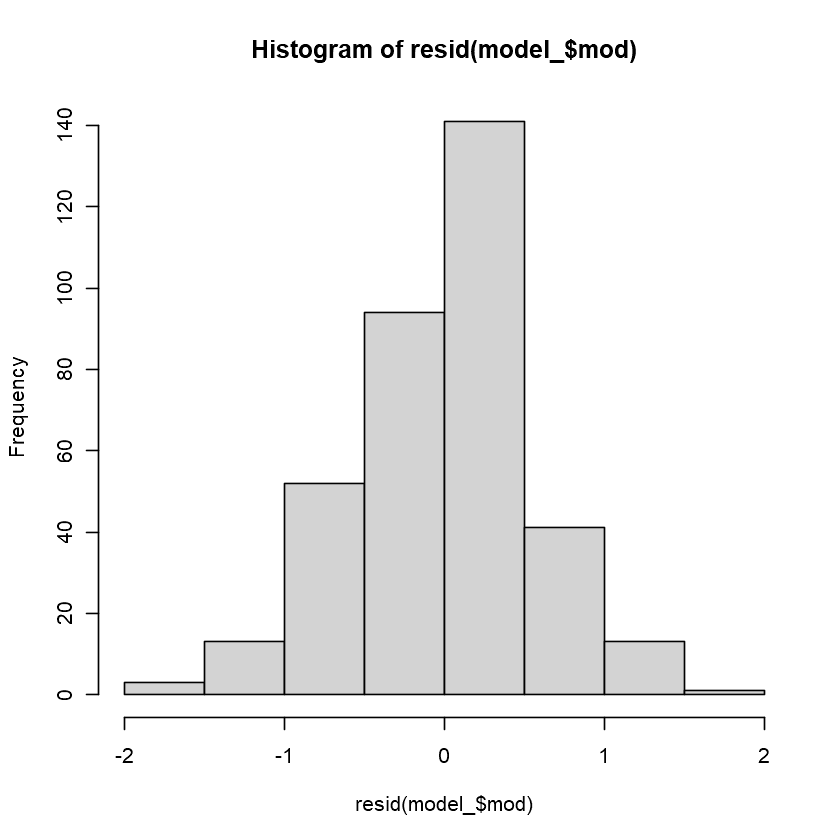

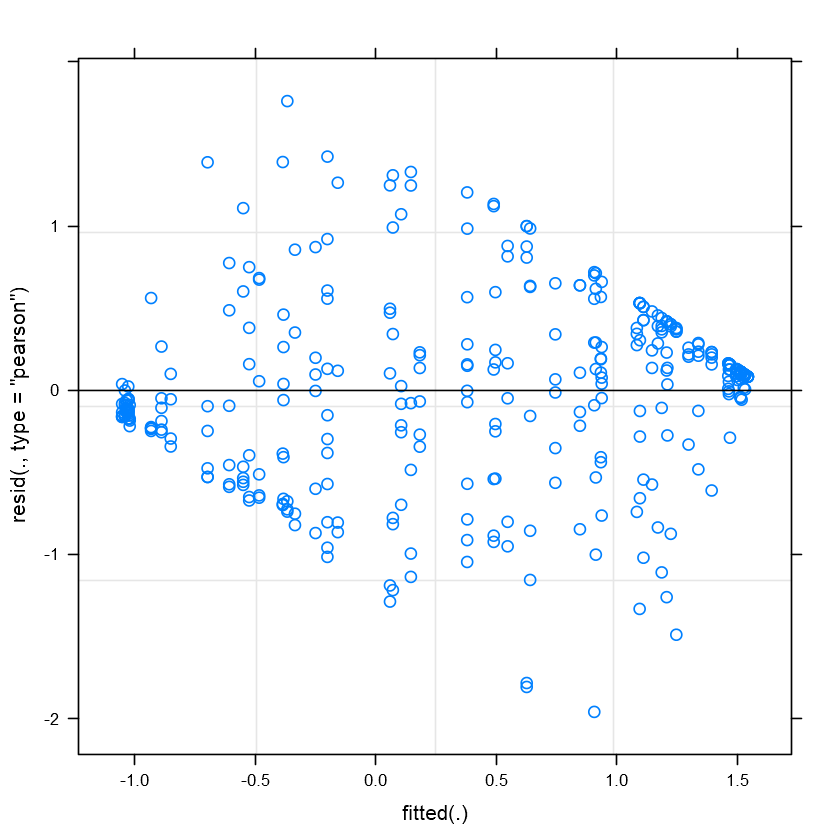

In [39]:
########  WEEK 1 ########
wib = 1
df_ = df[ which((df$WIB==wib)&(df$CLASS %in% c('Other'))), ]  
df_ = df[ which((df$WIB==wib)), ]  
model_ = rpt(PC1_standardized ~ weeklyavgDIB + (1|HenID), grname = c("HenID"), data = df_, datatype = "Gaussian", 
             nboot = nb, npermut = 0)
li_R_org = append(li_R_org, model_$R[[1]])
li_CIL_org = append(li_CIL_org, model_$CI_emp[,'2.5%'])
li_CIU_org = append(li_CIU_org, model_$CI_emp[,'97.5%'])
li_P = append(li_P, model_$P$LRT_P)
li_se_org = append(li_se_org, model_$se[[1]])
li_ngroup = append(li_ngroup, model_$ngroups[['HenID']])
li_nobs = append(li_nobs, model_$nobs)
li_mod = append(li_mod, model_$mod)
li_var = append(li_var, 'PC1_standardized')
li_wib = append(li_wib, wib)
#save model assumption verification 
name = 'PC1_standardized'

###### histogram of dep var 
#jpeg(file.path(path_model, paste(name,'_diagnostic_normally_distributed_residual_',i,'.jpg', sep='')))
qqnorm(resid(model_$mod), main = "Residuals")
qqline(resid(model_$mod))
#dev.off()
#jpeg(file.path(path_model, paste(name,'_diagnostic_normally_distributed_residual_histogram_',i,'.jpg', sep='')))
hist(resid(model_$mod))
#dev.off()
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
#jpeg(file.path(path_model, paste(name,'_diagnostic_homogeneity_variance_',i,'.jpg', sep='')))
plot(model_$mod)
#dev.off()    

Bootstrap Progress:


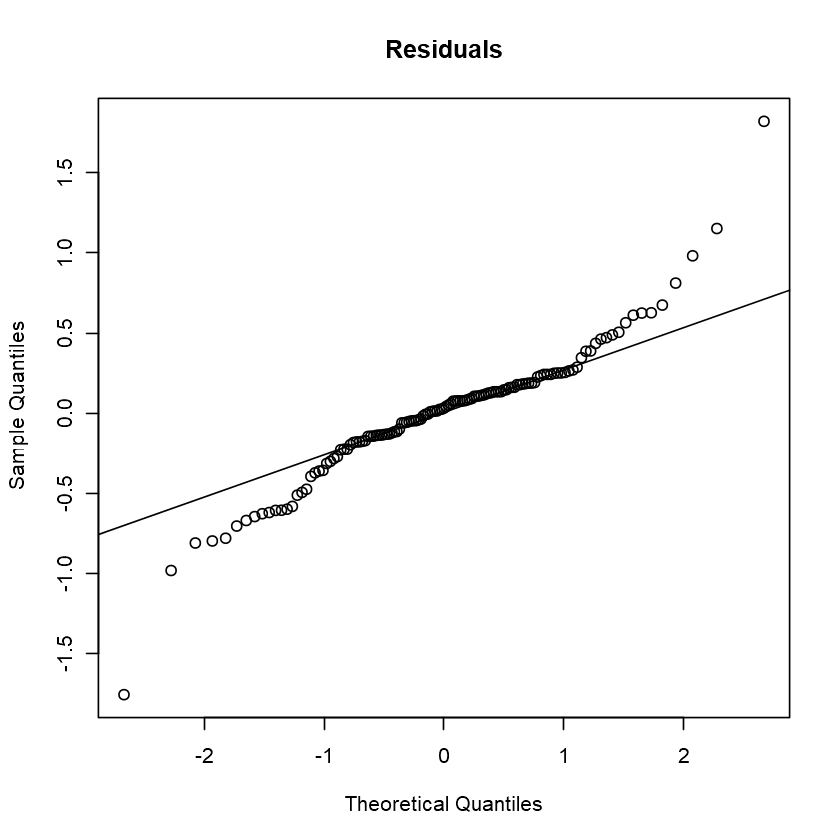

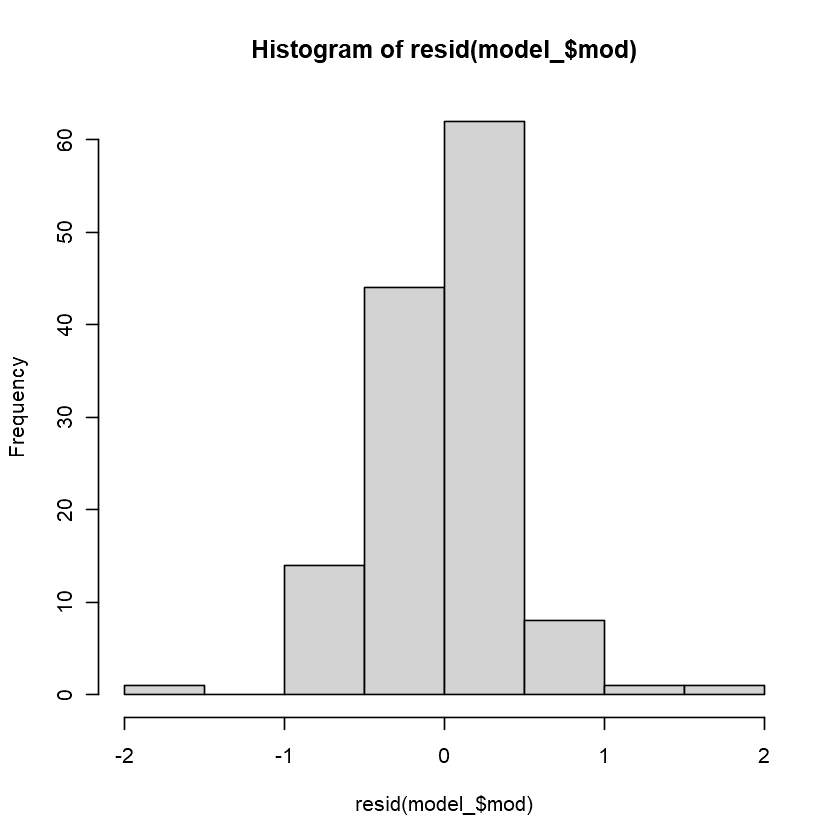

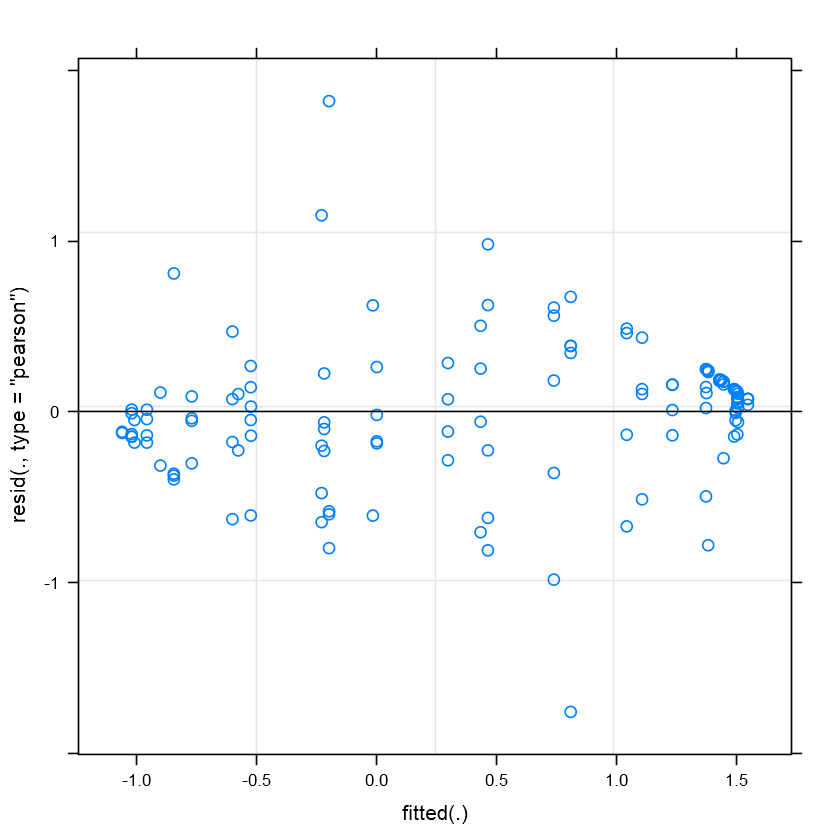

In [19]:
########  WEEK 2 ########
wib = 2
df_ = df[ which((df$WIB==wib)&(df$CLASS %in% c('Other'))), ]  
model_ = rpt(PC1_standardized ~ weeklyavgDIB + (1|HenID), grname = c("HenID"), data = df_, datatype = "Gaussian", 
             nboot = nb, npermut = 0)
li_R_org = append(li_R_org, model_$R[[1]])
li_CIL_org = append(li_CIL_org, model_$CI_emp[,'2.5%'])
li_CIU_org = append(li_CIU_org, model_$CI_emp[,'97.5%'])
li_P = append(li_P, model_$P$LRT_P)
li_se_org = append(li_se_org, model_$se[[1]])
li_ngroup = append(li_ngroup, model_$ngroups[['HenID']])
li_nobs = append(li_nobs, model_$nobs)
li_mod = append(li_mod, model_$mod)
li_var = append(li_var, 'PC1_standardized')
li_wib = append(li_wib, wib)
#save model assumption verification 
name = 'PC1_standardized'

###### histogram of dep var 
#jpeg(file.path(path_model, paste(name,'_diagnostic_normally_distributed_residual_',i,'.jpg', sep='')))
qqnorm(resid(model_$mod), main = "Residuals")
qqline(resid(model_$mod))
#dev.off()
#jpeg(file.path(path_model, paste(name,'_diagnostic_normally_distributed_residual_histogram_',i,'.jpg', sep='')))
hist(resid(model_$mod))
#dev.off()
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
#jpeg(file.path(path_model, paste(name,'_diagnostic_homogeneity_variance_',i,'.jpg', sep='')))
plot(model_$mod)
#dev.off()    

Bootstrap Progress:


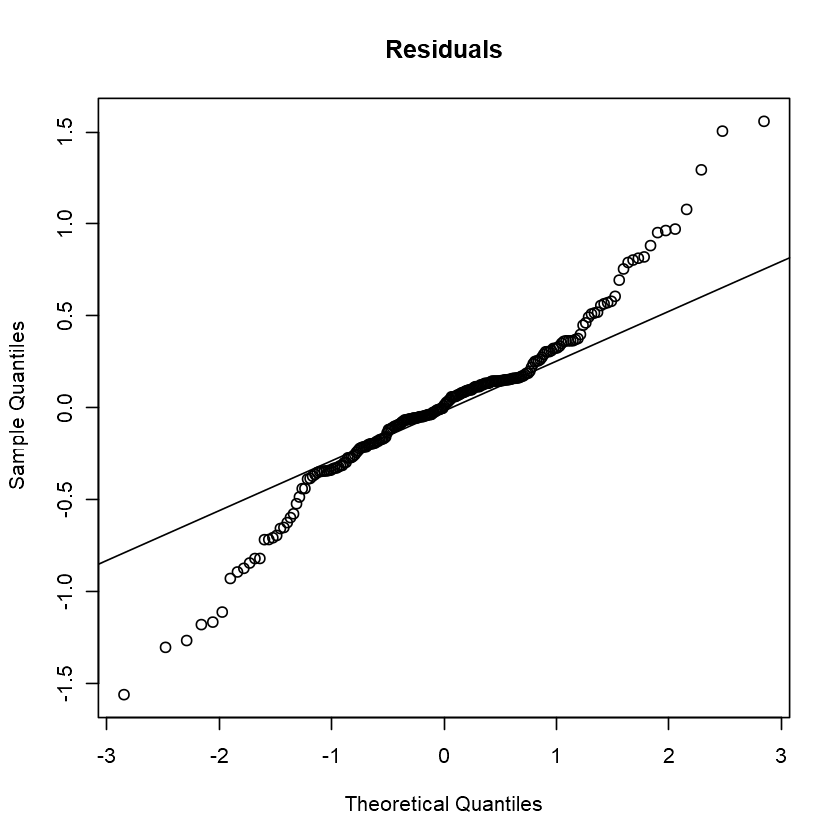

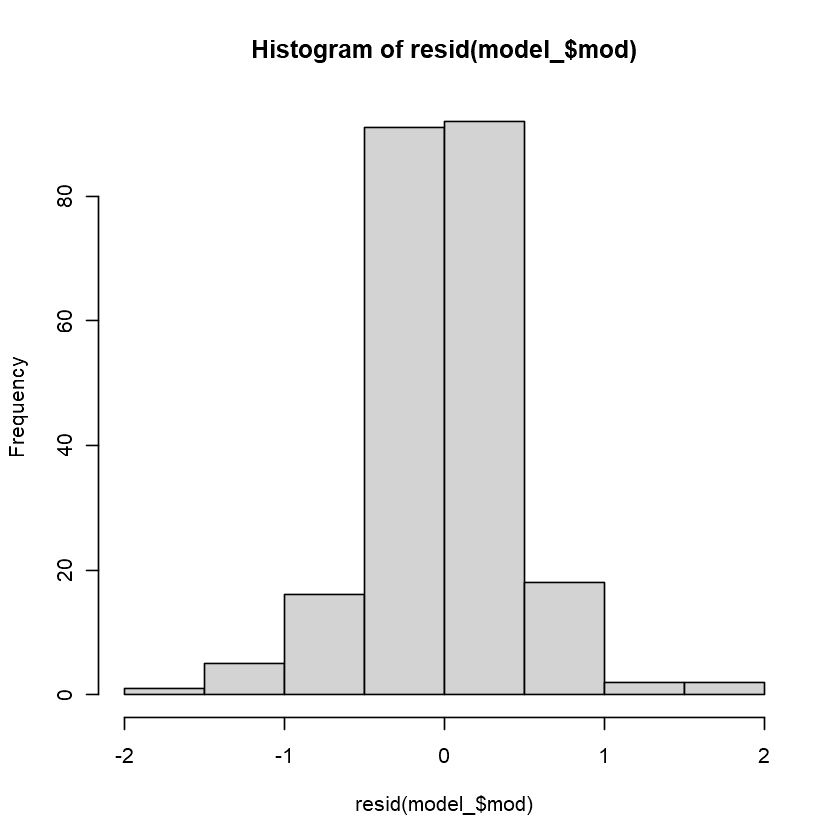

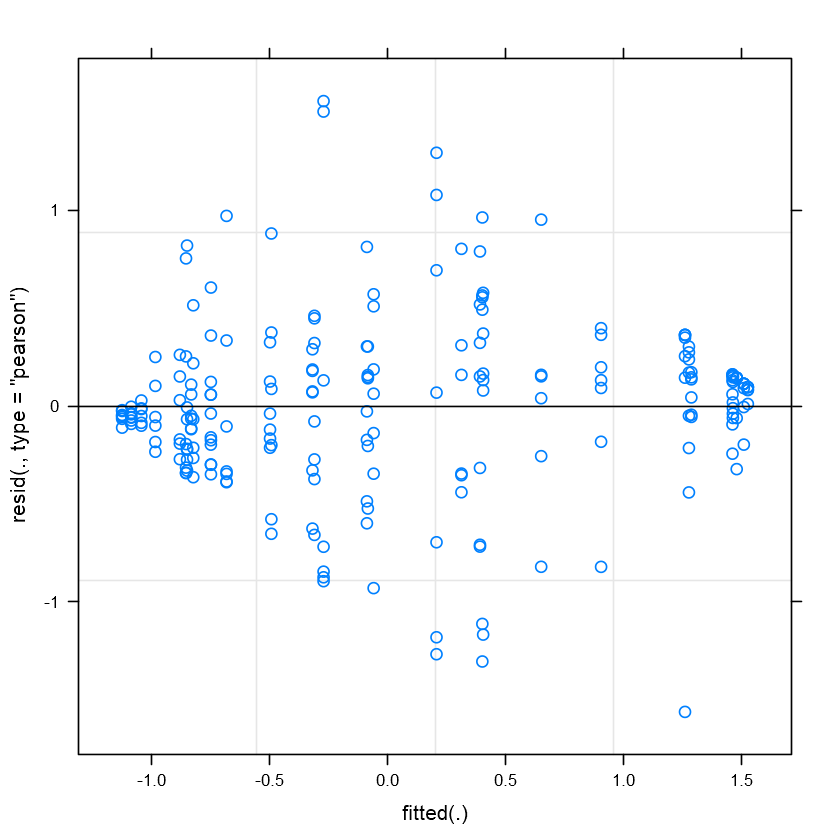

In [20]:
########  WEEK 3 ########
wib = 3
df_ = df[ which((df$WIB==wib)&(df$CLASS %in% c('Other'))), ]  
model_ = rpt(PC1_standardized ~ weeklyavgDIB + (1|HenID), grname = c("HenID"), data = df_, datatype = "Gaussian", 
             nboot = nb, npermut = 0)
li_R_org = append(li_R_org, model_$R[[1]])
li_CIL_org = append(li_CIL_org, model_$CI_emp[,'2.5%'])
li_CIU_org = append(li_CIU_org, model_$CI_emp[,'97.5%'])
li_P = append(li_P, model_$P$LRT_P)
li_se_org = append(li_se_org, model_$se[[1]])
li_ngroup = append(li_ngroup, model_$ngroups[['HenID']])
li_nobs = append(li_nobs, model_$nobs)
li_mod = append(li_mod, model_$mod)
li_var = append(li_var, 'PC1_standardized')
li_wib = append(li_wib, wib)
#save model assumption verification 
name = 'PC1_standardized'

###### histogram of dep var 
#jpeg(file.path(path_model, paste(name,'_diagnostic_normally_distributed_residual_',i,'.jpg', sep='')))
qqnorm(resid(model_$mod), main = "Residuals")
qqline(resid(model_$mod))
#dev.off()
#jpeg(file.path(path_model, paste(name,'_diagnostic_normally_distributed_residual_histogram_',i,'.jpg', sep='')))
hist(resid(model_$mod))
#dev.off()
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
#jpeg(file.path(path_model, paste(name,'_diagnostic_homogeneity_variance_',i,'.jpg', sep='')))
plot(model_$mod)
#dev.off()    

Bootstrap Progress:


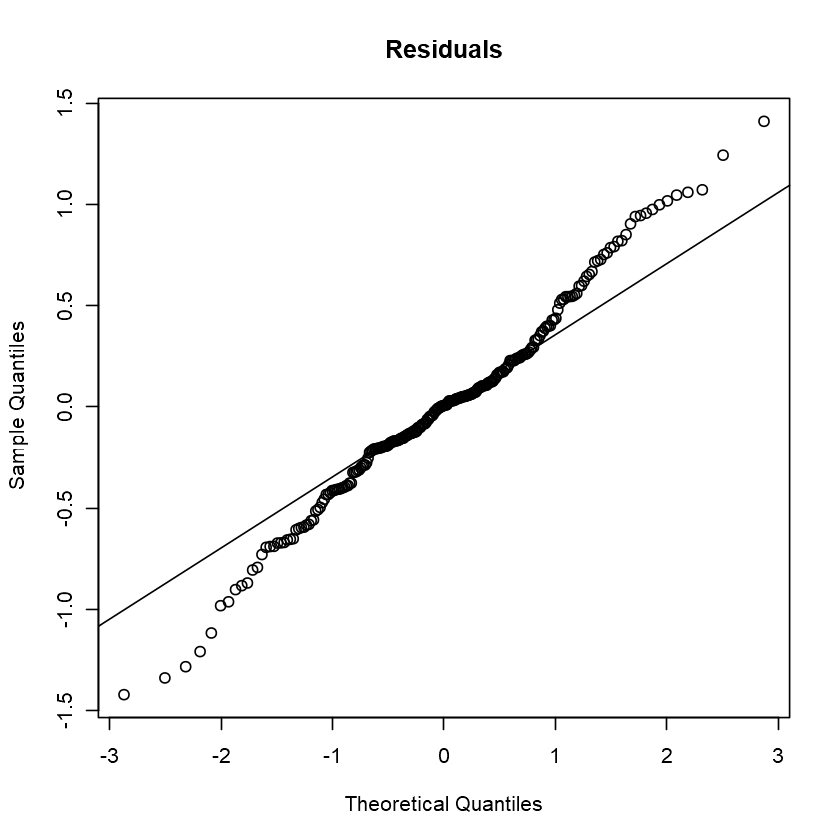

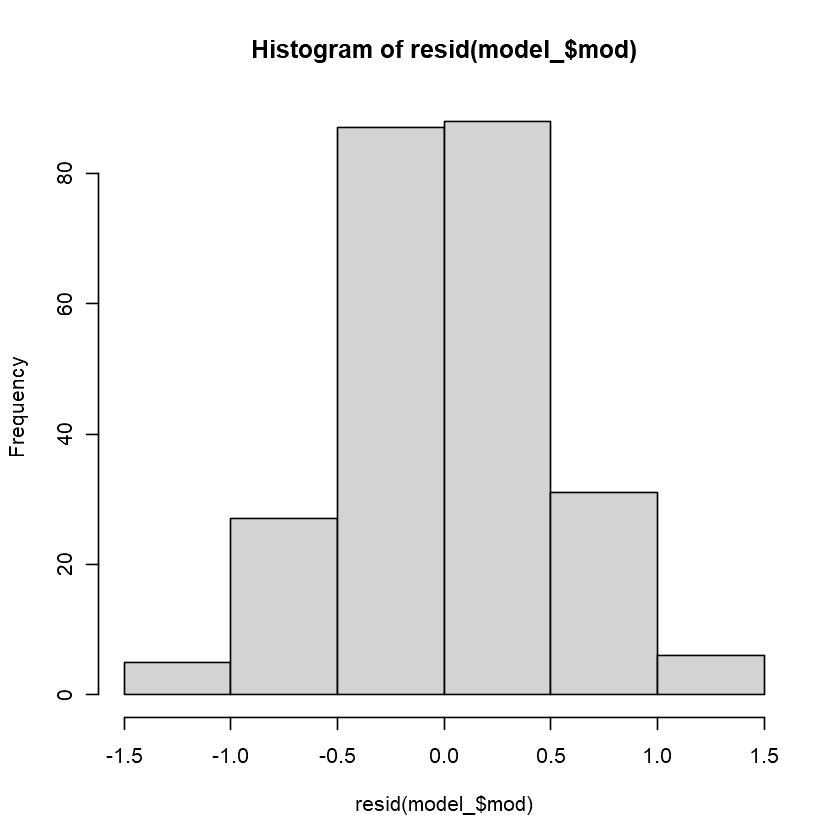

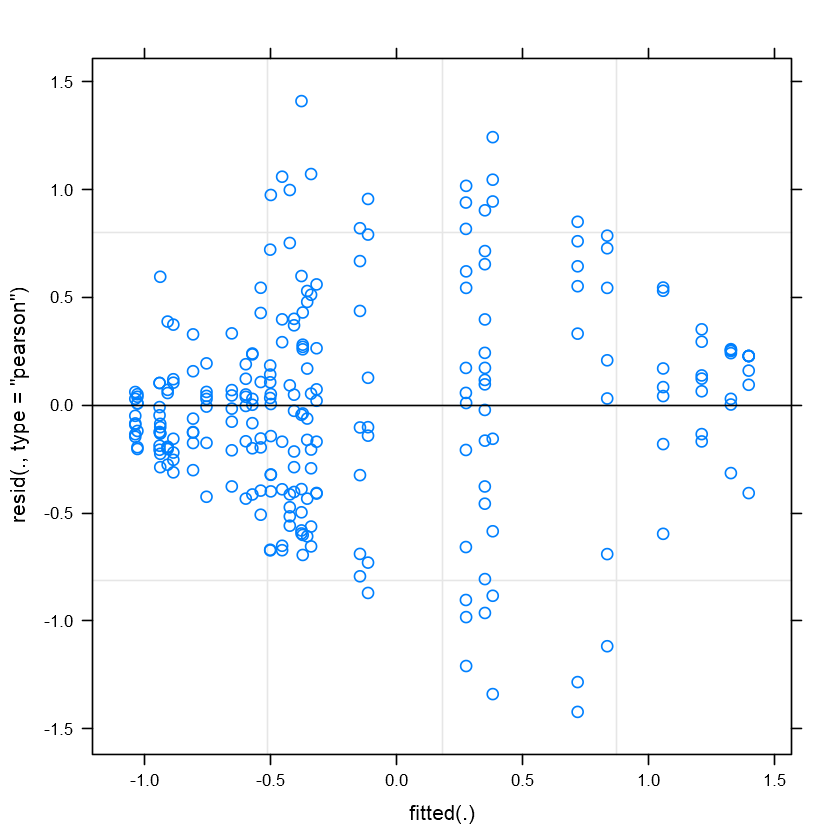

In [21]:
########  WEEK 4 ########
wib = 4
df_ = df[ which((df$WIB==wib)&(df$CLASS %in% c('Other'))), ]  
model_ = rpt(PC1_standardized ~ weeklyavgDIB + (1|HenID), grname = c("HenID"), data = df_, datatype = "Gaussian", 
             nboot = nb, npermut = 0)
li_R_org = append(li_R_org, model_$R[[1]])
li_CIL_org = append(li_CIL_org, model_$CI_emp[,'2.5%'])
li_CIU_org = append(li_CIU_org, model_$CI_emp[,'97.5%'])
li_P = append(li_P, model_$P$LRT_P)
li_se_org = append(li_se_org, model_$se[[1]])
li_ngroup = append(li_ngroup, model_$ngroups[['HenID']])
li_nobs = append(li_nobs, model_$nobs)
li_mod = append(li_mod, model_$mod)
li_var = append(li_var, 'PC1_standardized')
li_wib = append(li_wib, wib)
#save model assumption verification 
name = 'PC1_standardized'

###### histogram of dep var 
#jpeg(file.path(path_model, paste(name,'_diagnostic_normally_distributed_residual_',i,'.jpg', sep='')))
qqnorm(resid(model_$mod), main = "Residuals")
qqline(resid(model_$mod))
#dev.off()
#jpeg(file.path(path_model, paste(name,'_diagnostic_normally_distributed_residual_histogram_',i,'.jpg', sep='')))
hist(resid(model_$mod))
#dev.off()
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
#jpeg(file.path(path_model, paste(name,'_diagnostic_homogeneity_variance_',i,'.jpg', sep='')))
plot(model_$mod)
#dev.off()    

Bootstrap Progress:


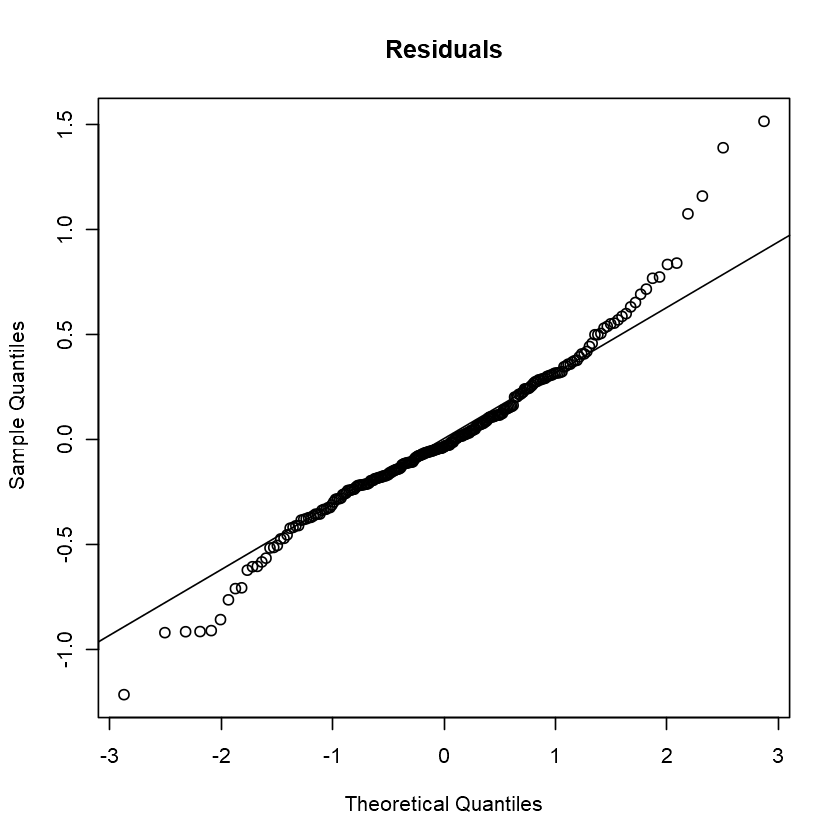

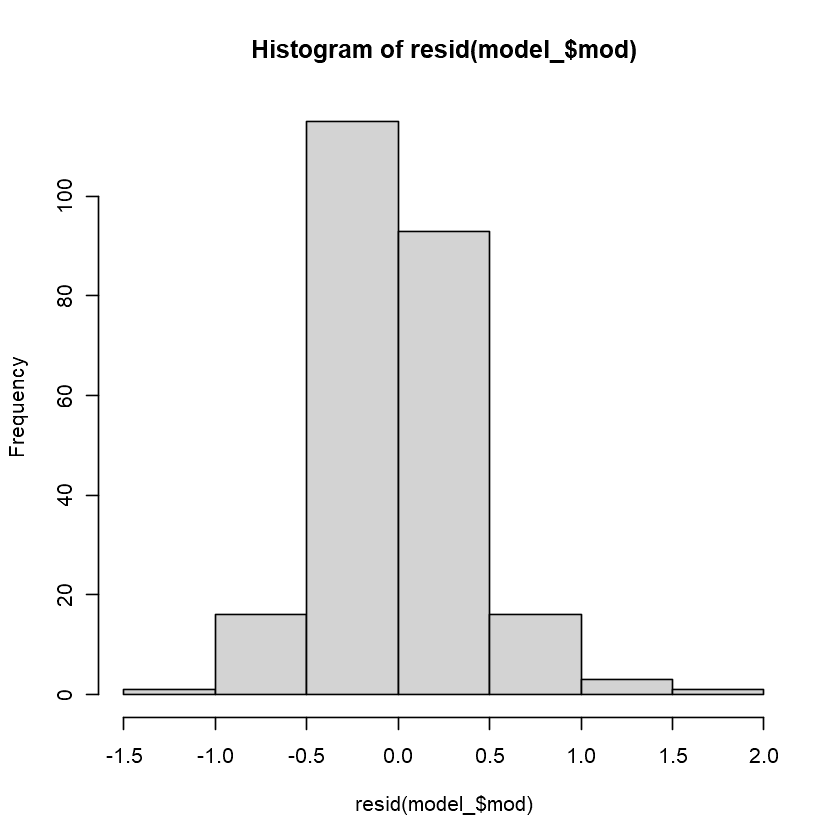

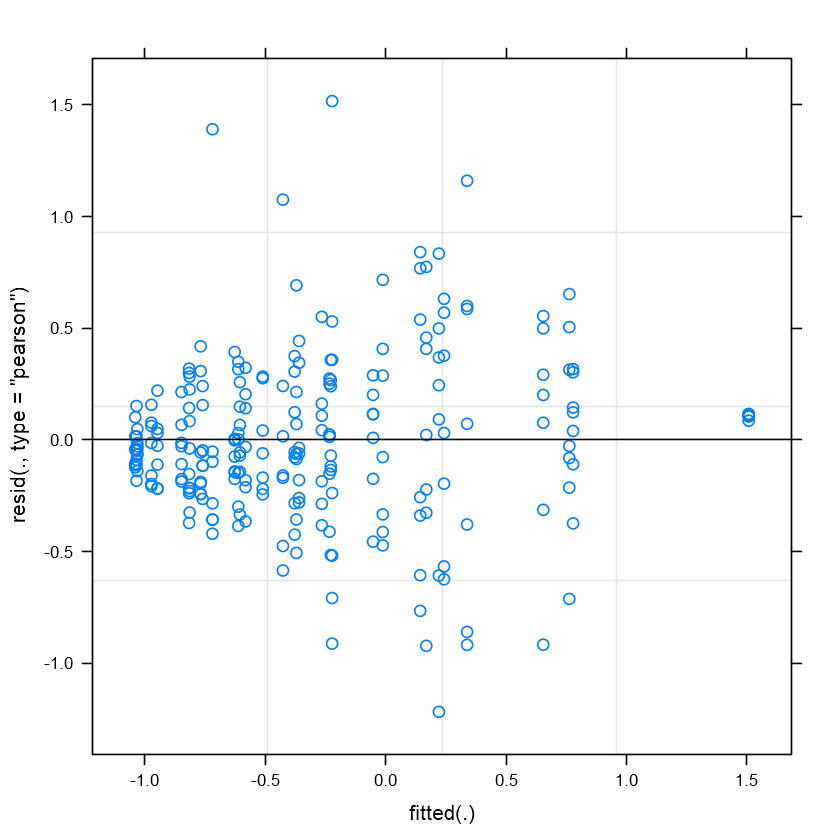

In [26]:
########  WEEK 5 ########
wib = 5
df_ = df[ which((df$WIB==wib)&(df$CLASS %in% c('Other'))), ]  
model_ = rpt(PC1_standardized ~ (1|HenID), grname = c("HenID"), data = df_, datatype = "Gaussian", 
             nboot = nb, npermut = 0)
li_R_org = append(li_R_org, model_$R[[1]])
li_CIL_org = append(li_CIL_org, model_$CI_emp[,'2.5%'])
li_CIU_org = append(li_CIU_org, model_$CI_emp[,'97.5%'])
li_P = append(li_P, model_$P$LRT_P)
li_se_org = append(li_se_org, model_$se[[1]])
li_ngroup = append(li_ngroup, model_$ngroups[['HenID']])
li_nobs = append(li_nobs, model_$nobs)
li_mod = append(li_mod, model_$mod)
li_var = append(li_var, 'PC1_standardized')
li_wib = append(li_wib, wib)
#save model assumption verification 
name = 'PC1_standardized'

###### histogram of dep var 
#jpeg(file.path(path_model, paste(name,'_diagnostic_normally_distributed_residual_',i,'.jpg', sep='')))
qqnorm(resid(model_$mod), main = "Residuals")
qqline(resid(model_$mod))
#dev.off()
#jpeg(file.path(path_model, paste(name,'_diagnostic_normally_distributed_residual_histogram_',i,'.jpg', sep='')))
hist(resid(model_$mod))
#dev.off()
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
#jpeg(file.path(path_model, paste(name,'_diagnostic_homogeneity_variance_',i,'.jpg', sep='')))
plot(model_$mod)
#dev.off()    

Bootstrap Progress:


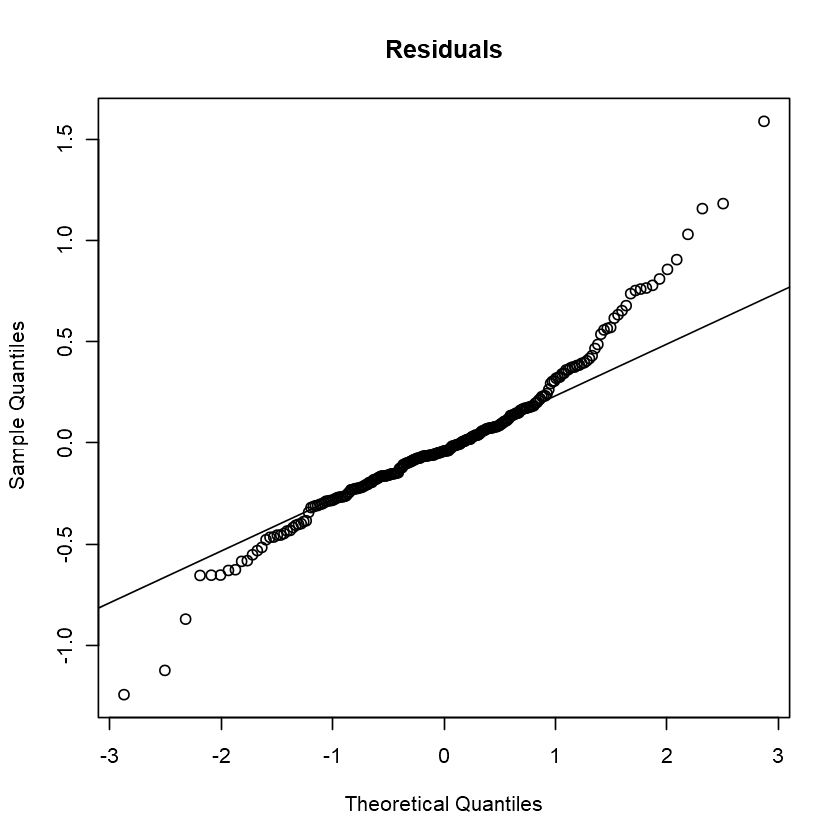

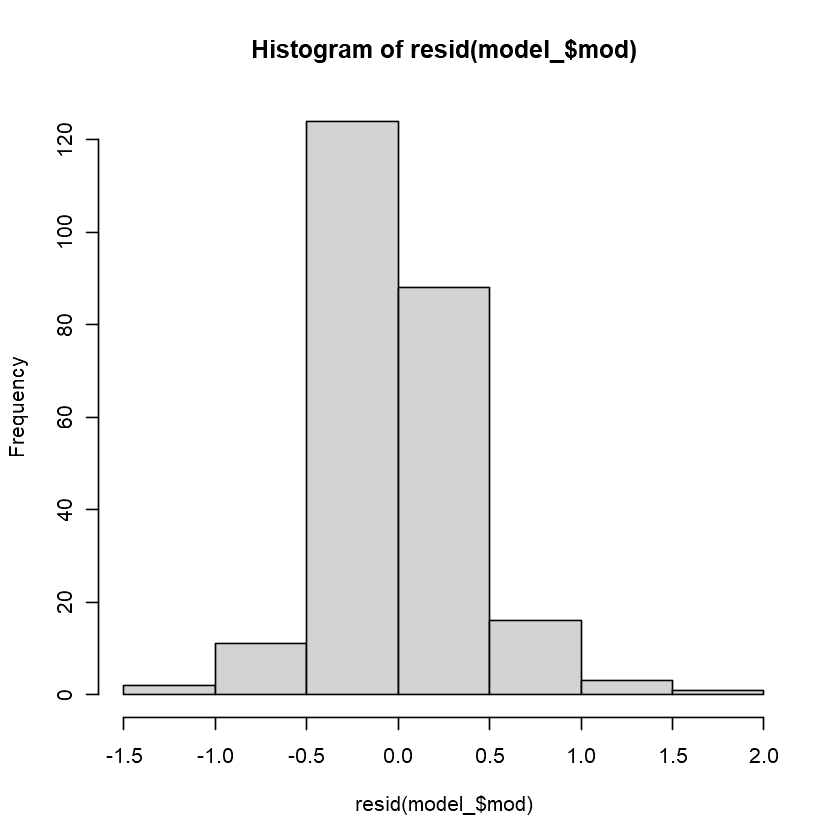

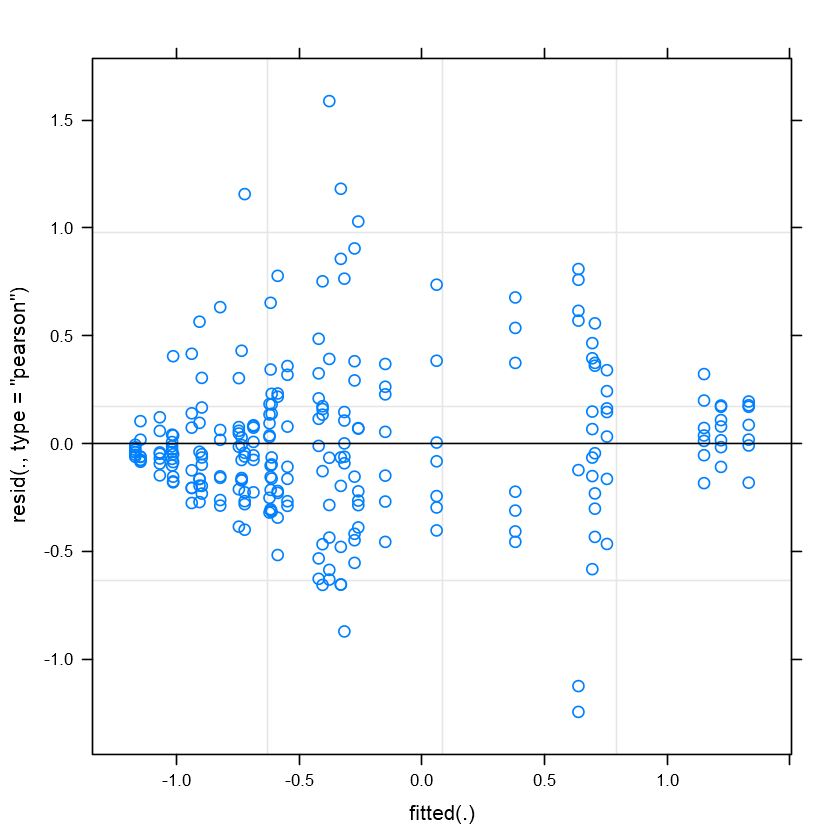

In [27]:
########  WEEK 6 ########
wib = 6
df_ = df[ which((df$WIB==wib)&(df$CLASS %in% c('Other'))), ]  
model_ = rpt(PC1_standardized ~  (1|HenID), grname = c("HenID"), data = df_, datatype = "Gaussian", 
             nboot = nb, npermut = 0)
li_R_org = append(li_R_org, model_$R[[1]])
li_CIL_org = append(li_CIL_org, model_$CI_emp[,'2.5%'])
li_CIU_org = append(li_CIU_org, model_$CI_emp[,'97.5%'])
li_P = append(li_P, model_$P$LRT_P)
li_se_org = append(li_se_org, model_$se[[1]])
li_ngroup = append(li_ngroup, model_$ngroups[['HenID']])
li_nobs = append(li_nobs, model_$nobs)
li_mod = append(li_mod, model_$mod)
li_var = append(li_var, 'PC1_standardized')
li_wib = append(li_wib, wib)
#save model assumption verification 
name = 'PC1_standardized'

###### histogram of dep var 
#jpeg(file.path(path_model, paste(name,'_diagnostic_normally_distributed_residual_',i,'.jpg', sep='')))
qqnorm(resid(model_$mod), main = "Residuals")
qqline(resid(model_$mod))
#dev.off()
#jpeg(file.path(path_model, paste(name,'_diagnostic_normally_distributed_residual_histogram_',i,'.jpg', sep='')))
hist(resid(model_$mod))
#dev.off()
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
#jpeg(file.path(path_model, paste(name,'_diagnostic_homogeneity_variance_',i,'.jpg', sep='')))
plot(model_$mod)
#dev.off()    

Bootstrap Progress:


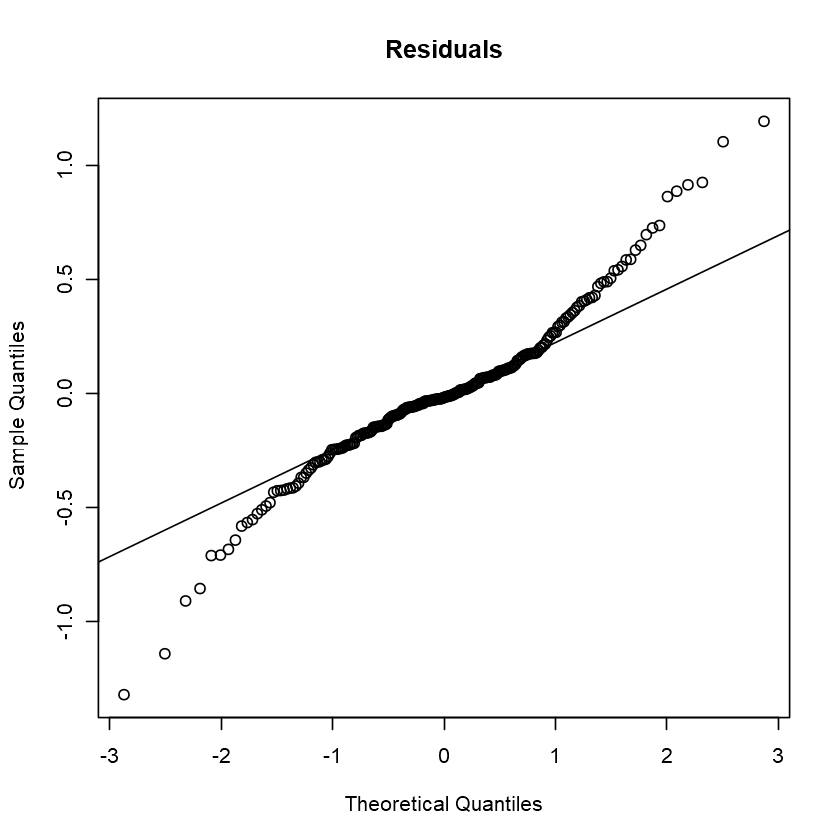

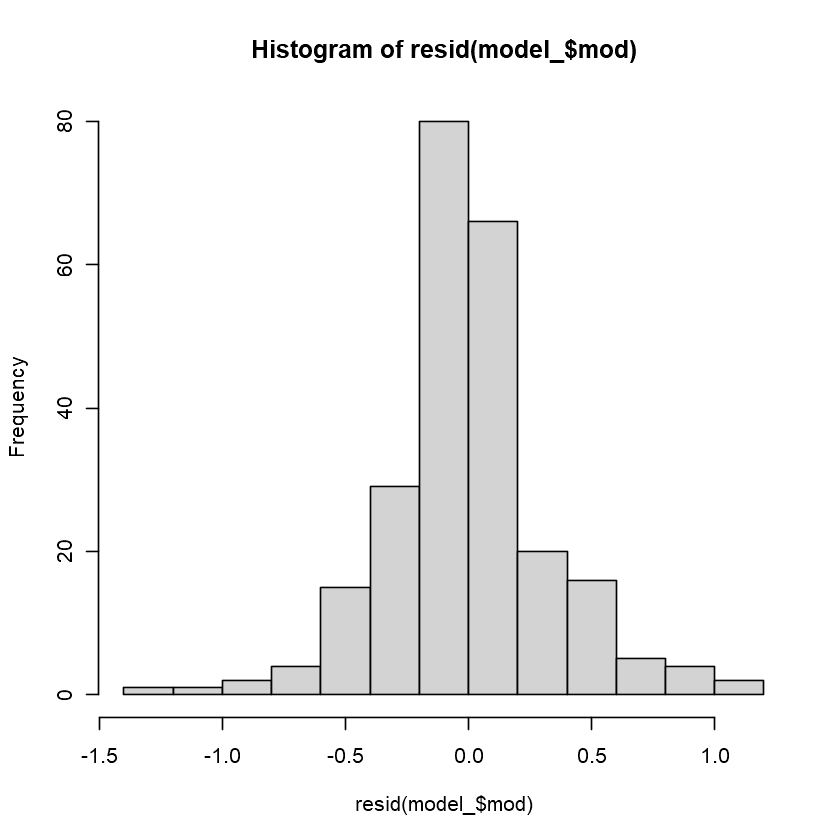

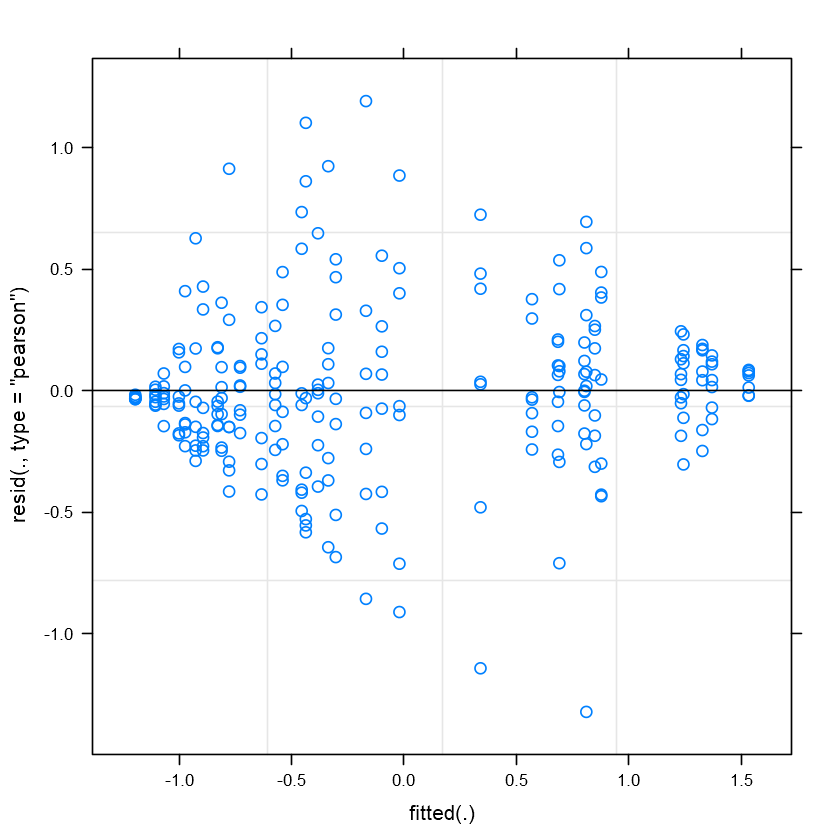

In [28]:
########  WEEK 7 ########
wib = 7
df_ = df[ which((df$WIB==wib)&(df$CLASS %in% c('Other'))), ]  
model_ = rpt(PC1_standardized ~  (1|HenID), grname = c("HenID"), data = df_, datatype = "Gaussian", 
             nboot = nb, npermut = 0)
li_R_org = append(li_R_org, model_$R[[1]])
li_CIL_org = append(li_CIL_org, model_$CI_emp[,'2.5%'])
li_CIU_org = append(li_CIU_org, model_$CI_emp[,'97.5%'])
li_P = append(li_P, model_$P$LRT_P)
li_se_org = append(li_se_org, model_$se[[1]])
li_ngroup = append(li_ngroup, model_$ngroups[['HenID']])
li_nobs = append(li_nobs, model_$nobs)
li_mod = append(li_mod, model_$mod)
li_var = append(li_var, 'PC1_standardized')
li_wib = append(li_wib, wib)
#save model assumption verification 
name = 'PC1_standardized'

###### histogram of dep var 
#jpeg(file.path(path_model, paste(name,'_diagnostic_normally_distributed_residual_',i,'.jpg', sep='')))
qqnorm(resid(model_$mod), main = "Residuals")
qqline(resid(model_$mod))
#dev.off()
#jpeg(file.path(path_model, paste(name,'_diagnostic_normally_distributed_residual_histogram_',i,'.jpg', sep='')))
hist(resid(model_$mod))
#dev.off()
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
#jpeg(file.path(path_model, paste(name,'_diagnostic_homogeneity_variance_',i,'.jpg', sep='')))
plot(model_$mod)
#dev.off()    

Bootstrap Progress:


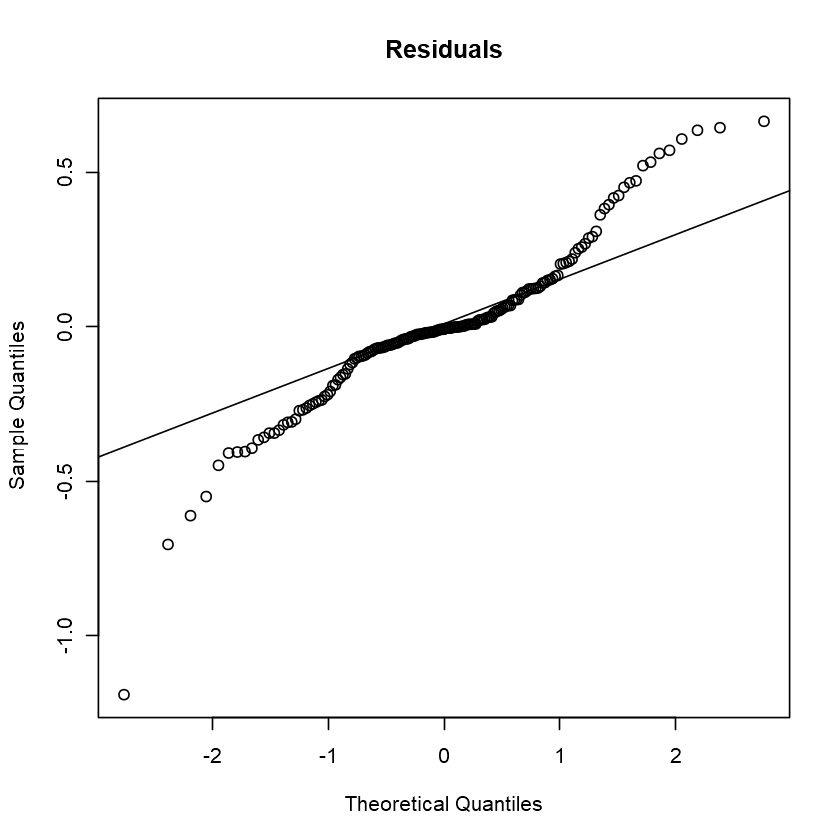

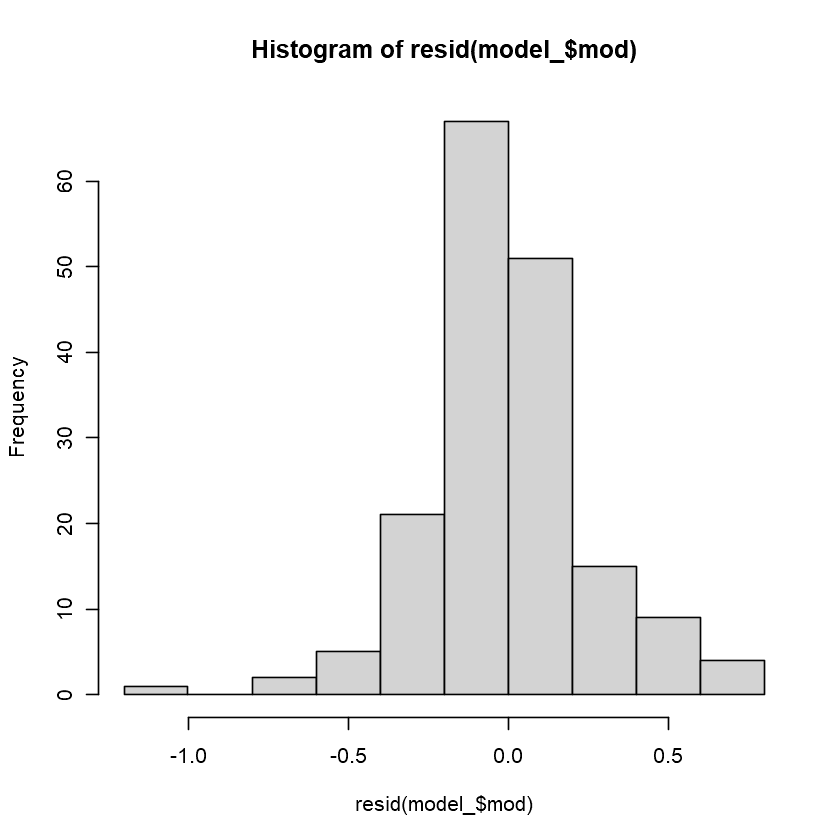

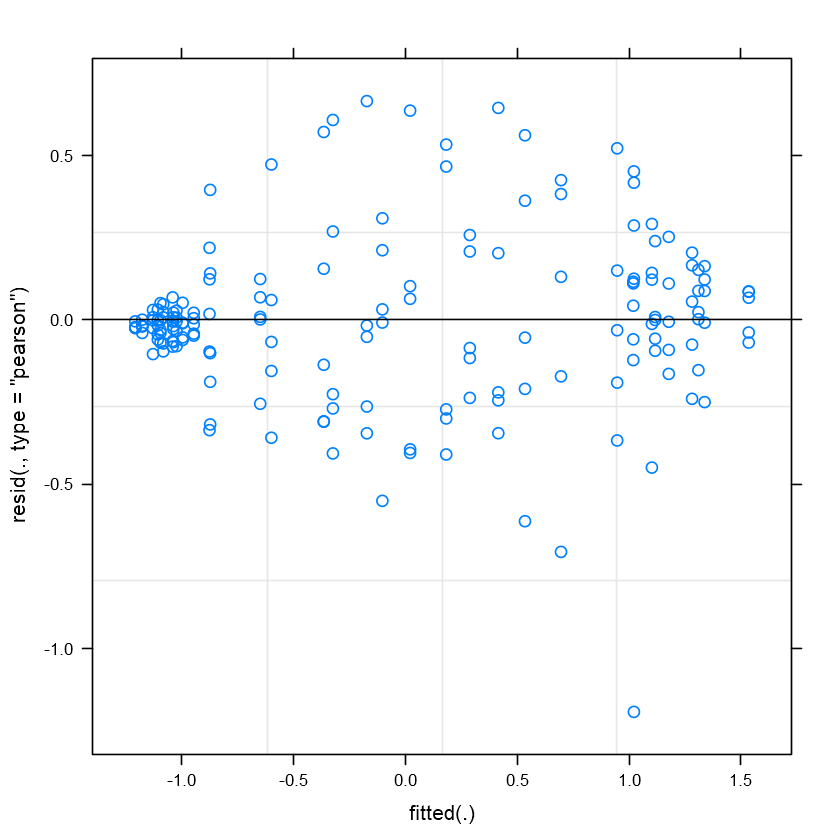

In [29]:
########  WEEK  8 ########
wib = 8
df_ = df[ which((df$WIB==wib)&(df$CLASS %in% c('Other'))), ]  
model_ = rpt(PC1_standardized ~  (1|HenID), grname = c("HenID"), data = df_, datatype = "Gaussian", 
             nboot = nb, npermut = 0)
li_R_org = append(li_R_org, model_$R[[1]])
li_CIL_org = append(li_CIL_org, model_$CI_emp[,'2.5%'])
li_CIU_org = append(li_CIU_org, model_$CI_emp[,'97.5%'])
li_P = append(li_P, model_$P$LRT_P)
li_se_org = append(li_se_org, model_$se[[1]])
li_ngroup = append(li_ngroup, model_$ngroups[['HenID']])
li_nobs = append(li_nobs, model_$nobs)
li_mod = append(li_mod, model_$mod)
li_var = append(li_var, 'PC1_standardized')
li_wib = append(li_wib, wib)
#save model assumption verification 
name = 'PC1_standardized'

###### histogram of dep var 
#jpeg(file.path(path_model, paste(name,'_diagnostic_normally_distributed_residual_',i,'.jpg', sep='')))
qqnorm(resid(model_$mod), main = "Residuals")
qqline(resid(model_$mod))
#dev.off()
#jpeg(file.path(path_model, paste(name,'_diagnostic_normally_distributed_residual_histogram_',i,'.jpg', sep='')))
hist(resid(model_$mod))
#dev.off()
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
#jpeg(file.path(path_model, paste(name,'_diagnostic_homogeneity_variance_',i,'.jpg', sep='')))
plot(model_$mod)
#dev.off()    

In [31]:
df_res = data.frame(li_R_org, li_CIL_org, li_CIU_org, li_P, li_se_org, li_ngroup, li_nobs, li_var, li_wib)
#save
#write.csv(df_res, file.path(path_adapt,'df_MVT_repeatibilityWIB_NEW.csv'))
df_res

li_R_org,li_CIL_org,li_CIU_org,li_P,li_se_org,li_ngroup,li_nobs,li_var,li_wib
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>
0.7414665,0.5982872,0.8273293,6.067400e-37,0.05789812,35,192,PC1_standardized,1
0.7414665,0.5936417,0.8295982,6.067400e-37,0.06081353,35,192,PC1_standardized,1
0.8025321,0.6776513,0.8751919,3.857269e-25,0.05058176,35,131,PC1_standardized,2
0.7858188,0.6778675,0.8612300,1.715808e-52,0.04830785,35,227,PC1_standardized,3
0.6743723,0.5156811,0.7704532,2.960488e-39,0.06513925,35,244,PC1_standardized,4
0.7065810,0.5772992,0.7950597,1.140304e-44,0.05770837,35,245,PC1_standardized,5
0.7807027,0.6607826,0.8517917,2.762791e-57,0.04898269,35,245,PC1_standardized,6
0.8514658,0.7602206,0.9033832,1.811763e-74,0.03655590,35,245,PC1_standardized,7
0.7065810,0.5742209,0.7982465,1.140304e-44,0.05904438,35,245,PC1_standardized,5


# Playground

### WEEK 1

In [69]:
#all wih CI = 0.95
name = 'PC1_standardized_Week1'
df_ = df[ which((df$WIB==1)&(df$CLASS %in% c('Other'))), ]  
model_ = rpt(PC1_standardized ~ avgDIB + (1|HenID), grname = c("HenID"), data = df_, datatype = "Gaussian", nboot = nb, npermut = 0, CI=0.95)
model_

Bootstrap Progress:




Repeatability estimation using the lmm method 

Repeatability for HenID
R  = 0.741
SE = 0.058
CI = [0.602, 0.827]
P  = 6.07e-37 [LRT]
     NA [Permutation]


In [10]:
#all wih CI = 0.95
name = 'PC1_standardized_Week1'
df_ = df[ which((df$WIB %in% c(1,2,3,4))&(df$CLASS %in% c('Other'))), ]  
model_ = rpt(PC1_standardized ~ DIB + (1|HenID), grname = c("HenID"), data = df_, datatype = "Gaussian", nboot = nb, npermut = 0, CI=0.95)
model_

Bootstrap Progress:




Repeatability estimation using the lmm method 

Repeatability for HenID
R  = 0.588
SE = 0.062
CI = [0.46, 0.696]
P  = 2.82e-126 [LRT]
     NA [Permutation]


In [11]:
#all wih CI = 0.95
name = 'PC1_standardized_Week1'
df_ = df[ which((df$WIB %in% c(5,6,7,8))&(df$CLASS %in% c('Other'))), ]  
model_ = rpt(PC1_standardized ~ DIB + (1|HenID), grname = c("HenID"), data = df_, datatype = "Gaussian", nboot = nb, npermut = 0, CI=0.95)
model_

Bootstrap Progress:




Repeatability estimation using the lmm method 

Repeatability for HenID
R  = 0.646
SE = 0.059
CI = [0.505, 0.735]
P  = 9.6e-175 [LRT]
     NA [Permutation]


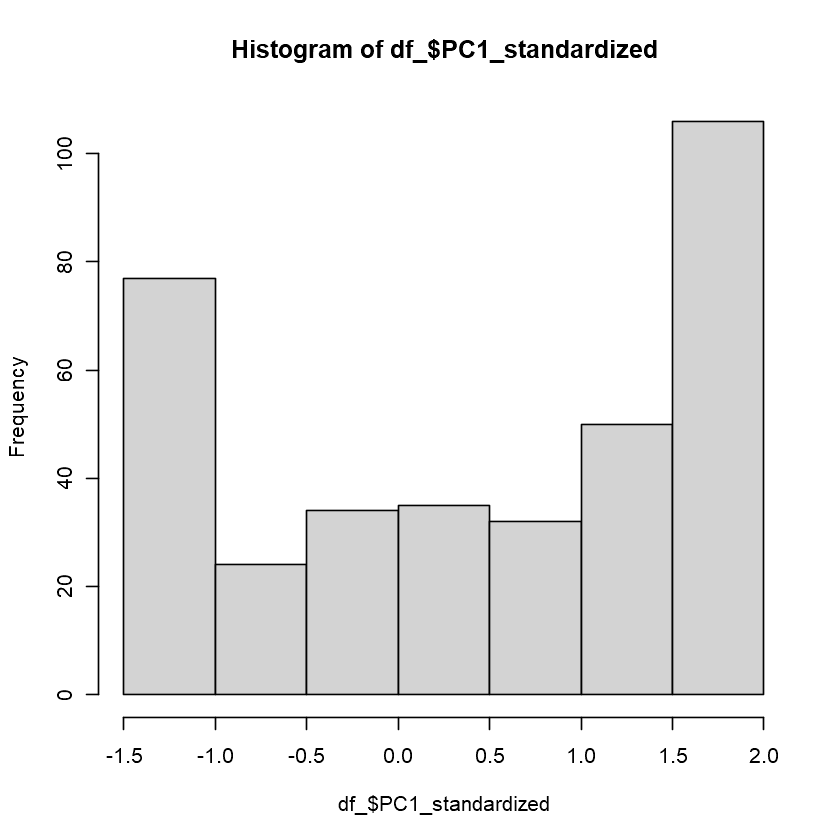

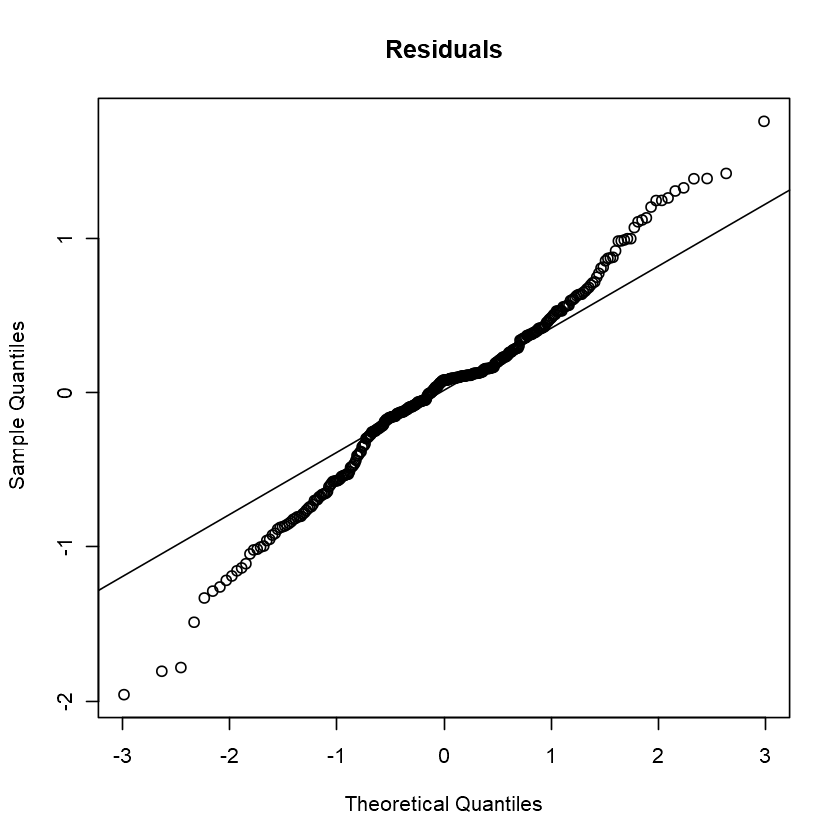

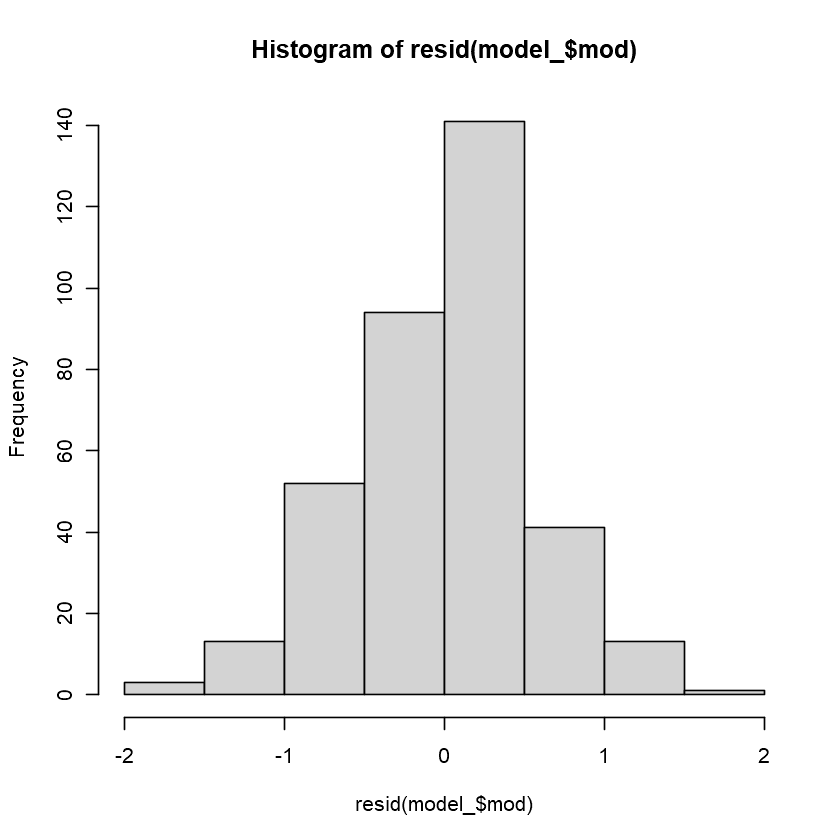

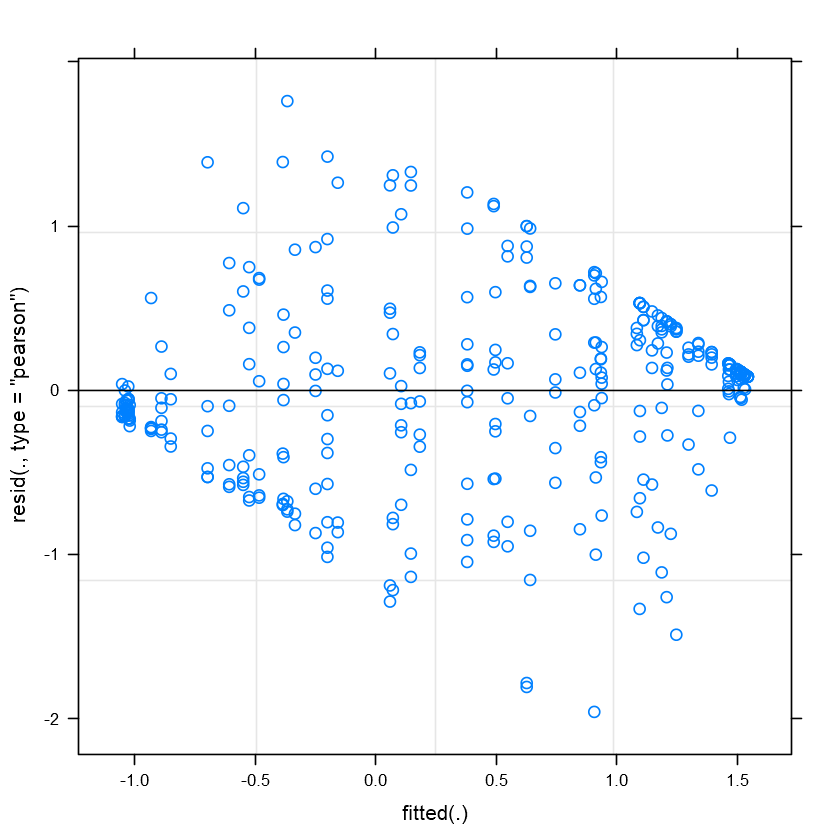

In [66]:
#visualise
hist(df_$PC1_standardized)
###### normally distributed residuals
qqnorm(resid(model_$mod), main = "Residuals")
qqline(resid(model_$mod))
hist(resid(model_$mod))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(model_$mod)

In [51]:
#SAVE all
li_R_org = append(li_R_org, model_$R[[1]])
li_CIL_org = append(li_CIL_org, model_$CI_emp[,'2.5%'])
li_CIU_org = append(li_CIU_org, model_$CI_emp[,'97.5%'])
li_P = append(li_P, model_$P$LRT_P)
li_se_org = append(li_se_org, model_$se[[1]])
li_ngroup = append(li_ngroup, model_$ngroups[['HenID']])
li_nobs = append(li_nobs, model_$nobs)
li_mod = append(li_mod, model_$mod)
li_wib = append(li_wib, name)
#save model assumption verification 
###### histogram of dep var 
#variance of the residuals is equal across groups. Even spread around the centered line?
jpeg(file.path(path_model,paste0(name,'_Histrogram.jpg')))
hist(df_$PC1_standardized)
dev.off()
###### normally distributed residuals
jpeg(file.path(path_model, paste(name,'_diagnostic_normally_distributed_residual.jpg', sep='')))
qqnorm(resid(model_$mod), main = "Residuals")
qqline(resid(model_$mod))
dev.off()
jpeg(file.path(path_model, paste(name,'_diagnostic_normally_distributed_residual_histogram_.jpg', sep='')))
hist(resid(model_$mod))
dev.off()
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
jpeg(file.path(path_model, paste(name,'_diagnostic_homogeneity_variance.jpg', sep='')))
plot(model_$mod)
dev.off()  

png 
  2

png 
  2

png 
  2

png 
  2

#per class MEXP with 84%
df_ = df[ which((df$WIB==1)&(df$CLASS %in% c('MEXP'))), ]  
model_ = rpt(PC1_standardized ~  avgDIB + (1|HenID), grname = c("HenID"), data = df_, datatype = "Gaussian",nboot = nb, npermut = 0, CI=0.84)
print(model_)

#per class LEXP with 84%
df_ = df[ which((df$WIB==1)&(df$CLASS %in% c('LEXP'))), ]  
model_ = rpt(PC1_standardized ~  avgDIB + (1|HenID), grname = c("HenID"), data = df_, datatype = "Gaussian",nboot = nb, npermut = 0, CI=0.84)
print(model_)

#per class other with 84%
df_ = df[ which((df$WIB==1)&(df$CLASS %in% c('Other'))), ]  
model_ = rpt(PC1_standardized ~  avgDIB + (1|HenID), grname = c("HenID"), data = df_, datatype = "Gaussian",nboot = nb, npermut = 0, CI=0.84)
print(model_)